In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df = pd.read_csv('eurobnb_no.csv')

In [4]:
df1 = df.drop('Unnamed: 0', axis=1)

In [5]:
#Just exploring the column names again
df1.columns

Index(['Price', 'Room Type', 'Shared Room', 'Private Room', 'Person Capacity',
       'Superhost?', 'Multi Listing?', 'Biz Listing?', 'cleanliness_rating',
       'guest satis rating', 'bedrooms', 'dist', 'metro_dist', 'attr_index',
       'attr_index_norm', 'Rest Index', 'Rest Index Norm', 'LNG', 'LAT',
       'Weekday/Weekend', 'city', 'GDP (B USD)', 'Country', 'Population',
       'Area in km2 ', 'Pop Density (ppl/km2)', 'GDP per capita'],
      dtype='object')

In [6]:
#Just a cursory overview of the data again
df1.head()

Price        Room Type  Shared Room  Private Room  Person Capacity  \
0  129.824479  Entire home/apt        False         False              4.0   
1  138.963748  Entire home/apt        False         False              4.0   
2  156.304923  Entire home/apt        False         False              3.0   
3   91.627024  Entire home/apt        False         False              4.0   
4   74.051508     Private room        False          True              2.0   

   Superhost?  Multi Listing?  Biz Listing?  cleanliness_rating  \
0       False               0             0                10.0   
1        True               1             0                10.0   
2        True               0             1                10.0   
3        True               1             0                10.0   
4       False               0             0                10.0   

   guest satis rating  ...       LNG       LAT  Weekday/Weekend    city  \
0               100.0  ...  23.76600  37.98300         weekdays  athens   
1                96.0  ...  23.73168  37.97776         weekdays  athens   
2                98.0  ...  23.72200  37.97900         weekdays  athens   
3                99.0  ...  23.72712  38.01435         weekdays  athens   
4               100.0  ...  23.73391  37.99529         weekdays  athens   

   GDP (B USD)  Country  Population  Area in km2   Pop Density (ppl/km2)  \
0         93.7   Greece      664046        2929.0             226.714237   
1         93.7   Greece      664046        2929.0             226.714237   
2         93.7   Greece      664046        2929.0             226.714237   
3         93.7   Greece      664046        2929.0             226.714237   
4         93.7   Greece      664046        2929.0             226.714237   

  GDP per capita  
0     141.104683  
1     141.104683  
2     141.104683  
3     141.104683  
4     141.104683  

[5 rows x 27 columns]

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


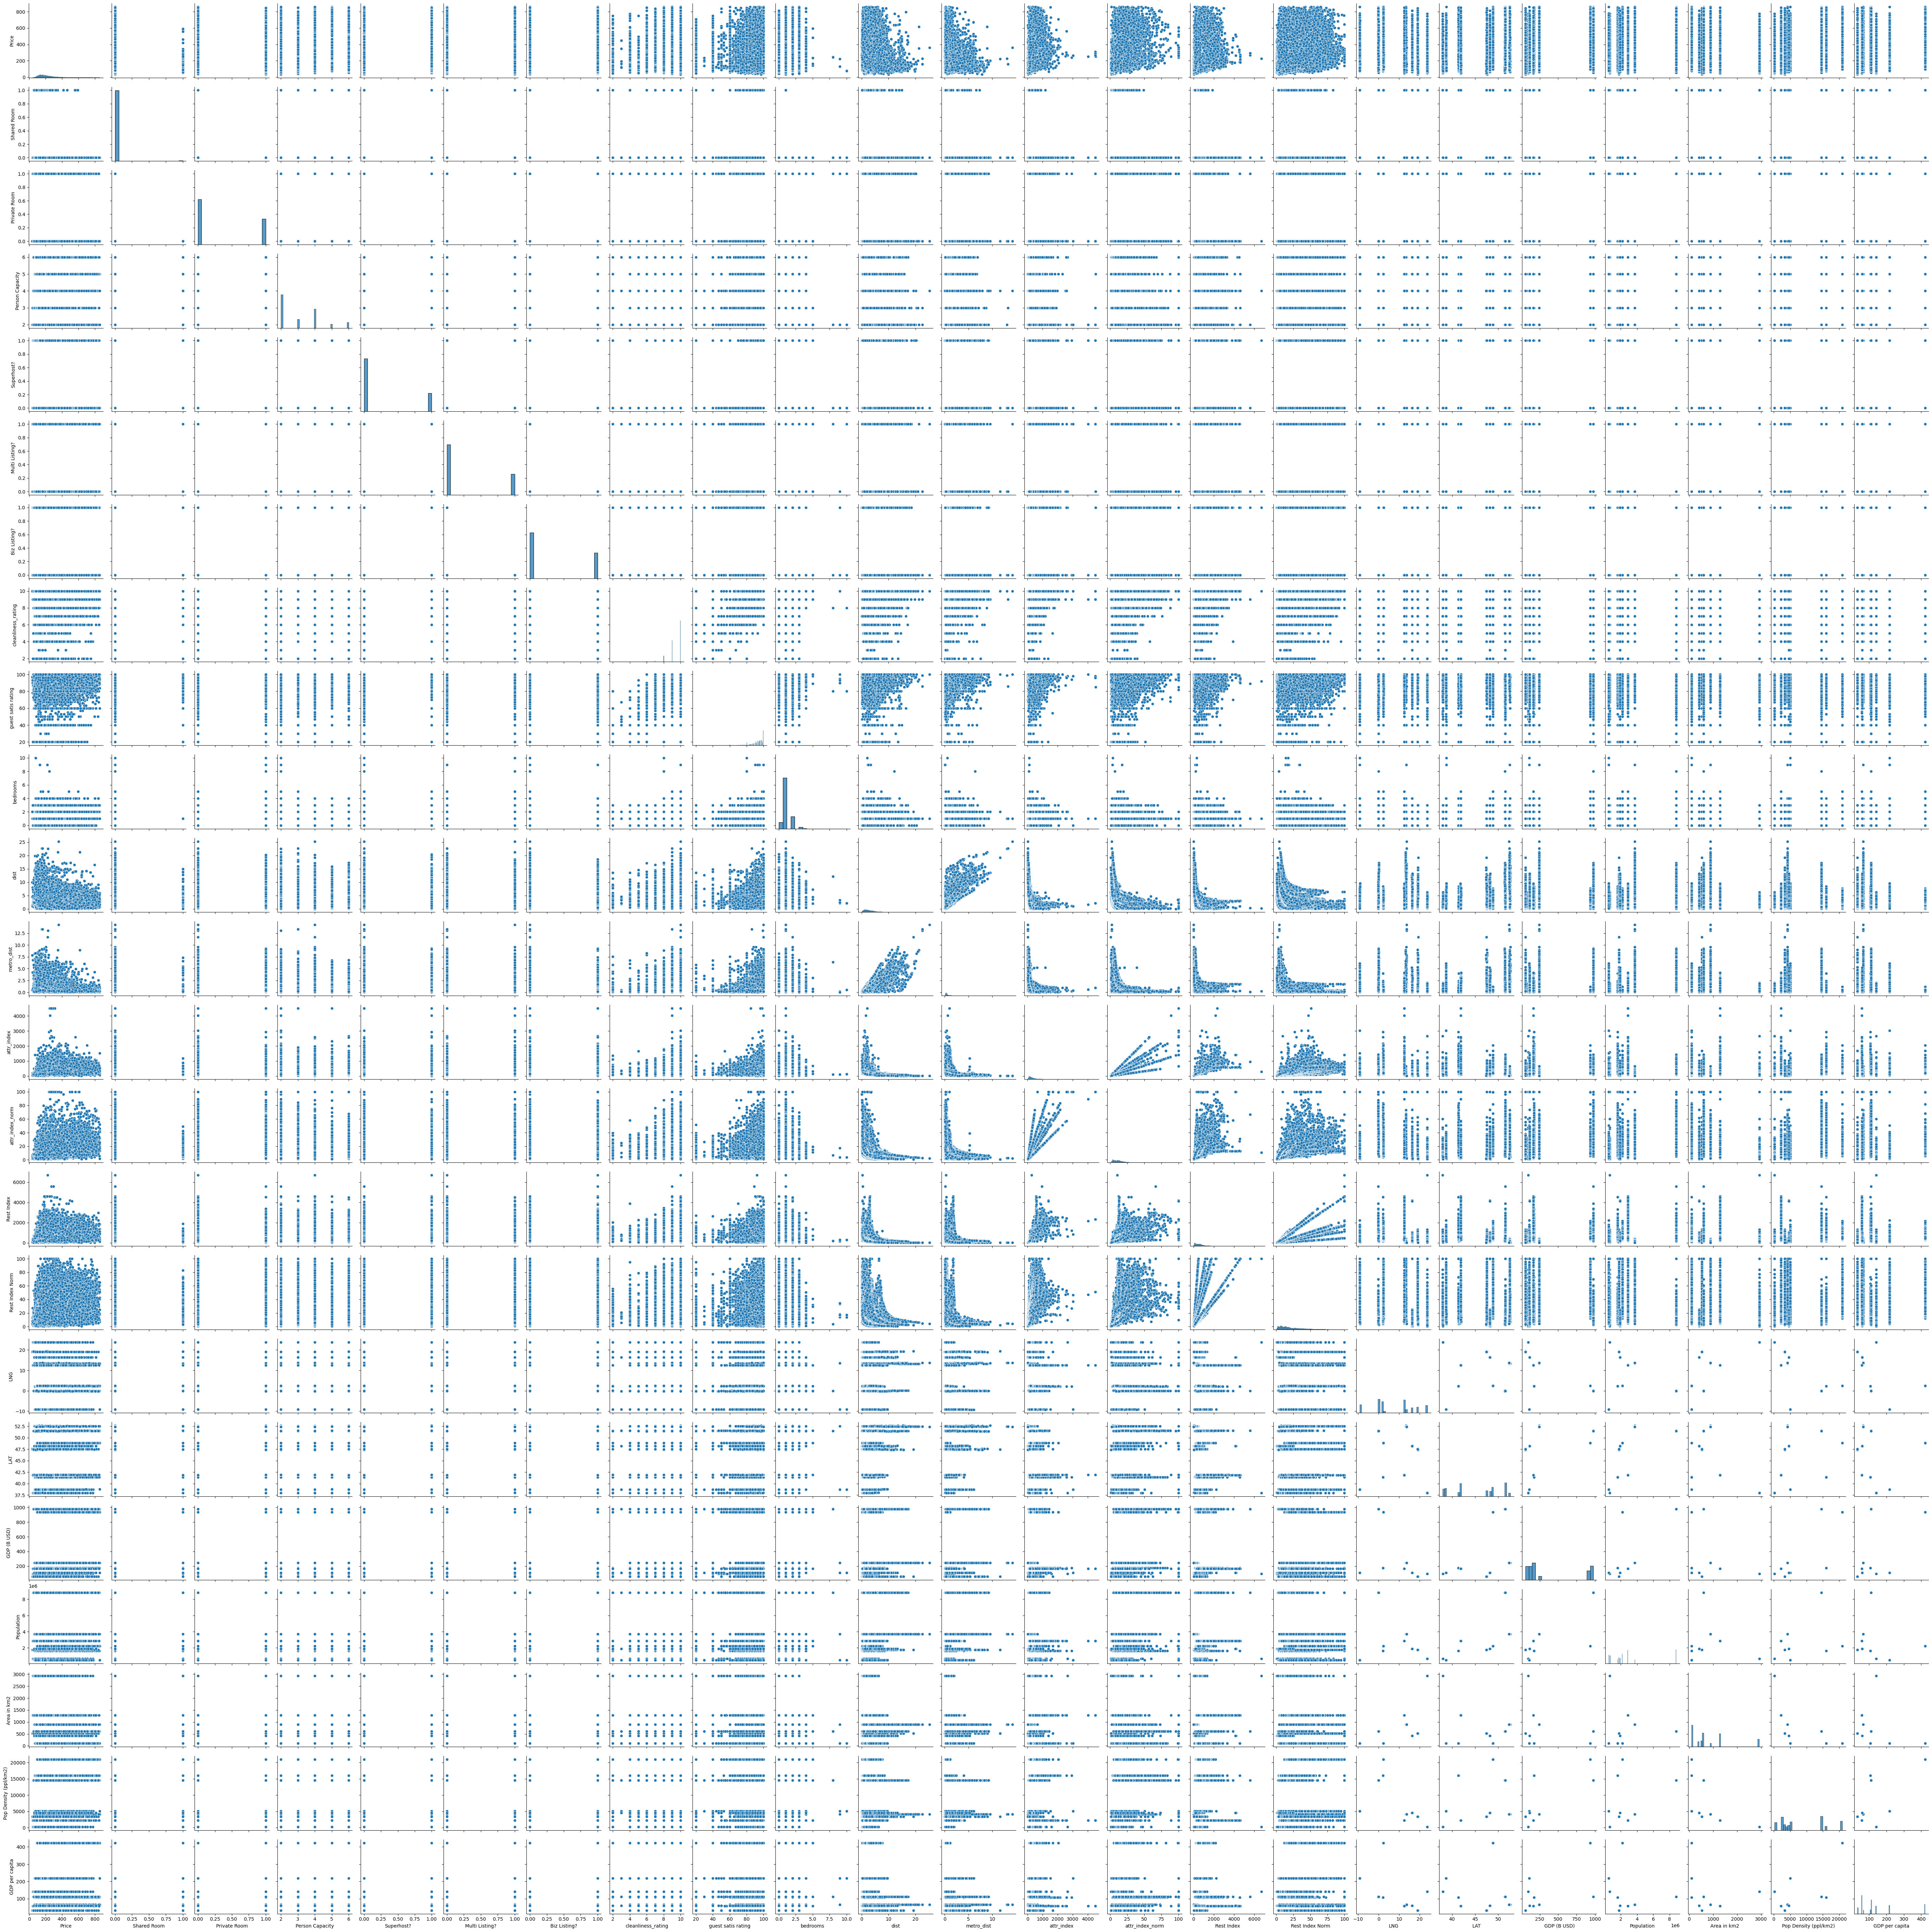

In [27]:
#Although sns.pairplot isn't directly relevant to this assignment, this pairplot illustrates that there is very little correlation between variables and target
#I don't have high hopes for the machine learning model eventually constructed on top of this data

sns.pairplot(df1)

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Person Capacity'}>,
        <AxesSubplot:title={'center':'Multi Listing?'}>,
        <AxesSubplot:title={'center':'Biz Listing?'}>],
       [<AxesSubplot:title={'center':'cleanliness_rating'}>,
        <AxesSubplot:title={'center':'guest satis rating'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'dist'}>],
       [<AxesSubplot:title={'center':'metro_dist'}>,
        <AxesSubplot:title={'center':'attr_index'}>,
        <AxesSubplot:title={'center':'attr_index_norm'}>,
        <AxesSubplot:title={'center':'Rest Index'}>],
       [<AxesSubplot:title={'center':'Rest Index Norm'}>,
        <AxesSubplot:title={'center':'LNG'}>,
        <AxesSubplot:title={'center':'LAT'}>,
        <AxesSubplot:title={'center':'GDP (B USD)'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Area in km2 '}>,
        <AxesSubplot:title={'

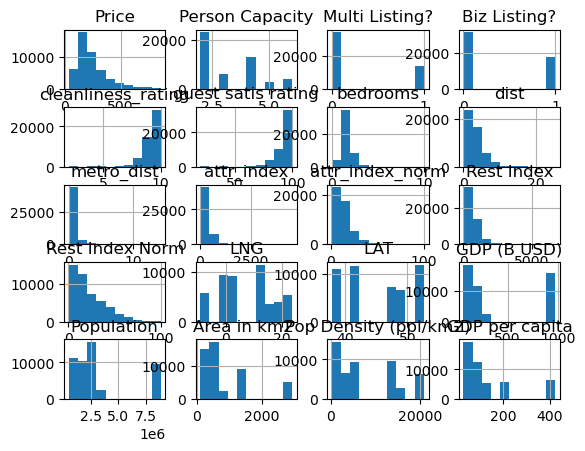

In [17]:
#Based on the histograms below, none of the features follow a normal distribution, nor a uniform distribution
#However, I'm currently only cognizant of the StandardScaler / MinMaxScaler methods to normalize my numeric features
#I know, eventually, applying StandardScaler/MinMaxScaler will further distort the data (since neither norm or uniform distribution models the data)

df1.hist()


In [ ]:
#Note1: I noticed I still have to convert the features Multi listing & Biz List into categorical features
#Note2: During EDA, I should have cut out the features LNG, LAT, Area in km2, attr_index_norm, rest index norm - for various reasons / useless 

In [45]:
df2 = df1.drop(['LNG', 'LAT', 'Area in km2 ', 'attr_index_norm', 'Rest Index Norm'], axis=1)
df2.head()

Price        Room Type  Shared Room  Private Room  Person Capacity  \
0  129.824479  Entire home/apt        False         False              4.0   
1  138.963748  Entire home/apt        False         False              4.0   
2  156.304923  Entire home/apt        False         False              3.0   
3   91.627024  Entire home/apt        False         False              4.0   
4   74.051508     Private room        False          True              2.0   

   Superhost?  Multi Listing?  Biz Listing?  cleanliness_rating  \
0       False               0             0                10.0   
1        True               1             0                10.0   
2        True               0             1                10.0   
3        True               1             0                10.0   
4       False               0             0                10.0   

   guest satis rating  ...  metro_dist  attr_index  Rest Index  \
0               100.0  ...    0.881890   55.348572   78.778377   
1                96.0  ...    0.304568  240.306654  407.167696   
2                98.0  ...    0.288488  199.507366  395.967403   
3                99.0  ...    0.297467   39.803047   58.706578   
4               100.0  ...    0.385266   78.733405  113.325973   

   Weekday/Weekend    city GDP (B USD) Country  Population  \
0         weekdays  athens        93.7  Greece      664046   
1         weekdays  athens        93.7  Greece      664046   
2         weekdays  athens        93.7  Greece      664046   
3         weekdays  athens        93.7  Greece      664046   
4         weekdays  athens        93.7  Greece      664046   

  Pop Density (ppl/km2)  GDP per capita  
0            226.714237      141.104683  
1            226.714237      141.104683  
2            226.714237      141.104683  
3            226.714237      141.104683  
4            226.714237      141.104683  

[5 rows x 22 columns]

In [ ]:
#For the below codes, changing relevant categorical columsn into object dtypes (previously they were Booleans)
#This is so pd.get_dummmies (in the next step) can only convert columns with dtypes = object

In [73]:
df2['Shared Room'] = df2['Shared Room'].astype('object')

In [75]:
df2['Private Room'] = df2['Private Room'].astype('object')

In [77]:
df2['Superhost?'] = df2['Superhost?'].astype('object')

In [79]:
df2['Multi Listing?'] = df2['Multi Listing?'].astype('object')

In [81]:
df2['Biz Listing?'] = df2['Biz Listing?'].astype('object')

In [82]:
#Checking to see all the relevant bool categories converted into objects
df2.dtypes

Price                    float64
Room Type                 object
Shared Room               object
Private Room              object
Person Capacity          float64
Superhost?                object
Multi Listing?            object
Biz Listing?              object
cleanliness_rating       float64
guest satis rating       float64
bedrooms                   int64
dist                     float64
metro_dist               float64
attr_index               float64
Rest Index               float64
Weekday/Weekend           object
city                      object
GDP (B USD)              float64
Country                   object
Population                 int64
Pop Density (ppl/km2)    float64
GDP per capita           float64
dtype: object

In [104]:
#Creating dummy variables with pd.get_dummies
#Dropping first columns to reduce multi collinearity with drop_first=True
#Setting dtype=int to output columns as 0 vs 1, instead of Booleans (False vs True)
#Question for mentor: I believe all categories have to be numerical to conduct linear regressions?
#Also, I read one hot encoder is better vs pd.get_dummies because it ensures all categories remain present in both train vs test data?

df3 = pd.get_dummies(df2, drop_first=True, dtype=int)
df3.head()

Price  Person Capacity  cleanliness_rating  guest satis rating  \
0  129.824479              4.0                10.0               100.0   
1  138.963748              4.0                10.0                96.0   
2  156.304923              3.0                10.0                98.0   
3   91.627024              4.0                10.0                99.0   
4   74.051508              2.0                10.0               100.0   

   bedrooms      dist  metro_dist  attr_index  Rest Index  GDP (B USD)  ...  \
0         2  2.813964    0.881890   55.348572   78.778377         93.7  ...   
1         1  0.407293    0.304568  240.306654  407.167696         93.7  ...   
2         1  1.237211    0.288488  199.507366  395.967403         93.7  ...   
3         1  4.367457    0.297467   39.803047   58.706578         93.7  ...   
4         1  2.194185    0.385266   78.733405  113.325973         93.7  ...   

   city_rome  city_vienna  Country_England  Country_France  Country_Germany  \
0          0            0                0               0                0   
1          0            0                0               0                0   
2          0            0                0               0                0   
3          0            0                0               0                0   
4          0            0                0               0                0   

   Country_Greece  Country_Hungary  Country_Italy  Country_Portugal  \
0               1                0              0                 0   
1               1                0              0                 0   
2               1                0              0                 0   
3               1                0              0                 0   
4               1                0              0                 0   

   Country_Spain  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 37 columns]

In [ ]:
#Question for mentor
#Bedrooms = Categorical? or numeric?
#Also, for multi and biz listing features, I should convert into categorical variables? Right now its in 0 vs 1 within one column
#I have difficulty deciding between categorical vs numeric columns for certain columns

In [105]:
#Question for mentor - I believe train_test_split is performed before StandardScaler.fit() to prevent data leakage?
#Creating X and Y variables for train_test_split
X = df3.drop('Price', axis=1)
y = df3['Price']

In [107]:
#Creating train-test-split datasets
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [115]:
#Fitting and transforming StandardScaler to X_train
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

In [ ]:
#Transforming x_test based on fitted x_train
x_test_scaled = scaler.transform(x_test)